In [3]:
import tensorflow as tf
print (tf.__version__)

2.4.0


In [9]:
mnist = tf.keras.datasets.fashion_mnist

In [11]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [18]:
import numpy as np
np.set_printoptions(linewidth=200)

print(training_images.size)
print(training_labels.size)

print(test_images.size)
print(test_labels.size)

47040000
60000
7840000
10000


In [21]:
print(training_labels[0])
print(training_images[0])

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

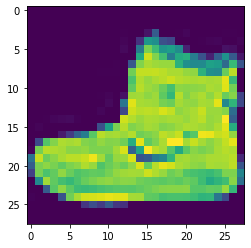

In [22]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])

In [24]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [26]:
print(training_labels[0])
print(training_images[0])

9
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000

In [27]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [34]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 680us/step - loss: 0.4722 - accuracy: 0.8334
Epoch 2/5
1875/1875 [==============================] - 1s 701us/step - loss: 0.4565 - accuracy: 0.8394
Epoch 3/5
1875/1875 [==============================] - 1s 680us/step - loss: 0.4442 - accuracy: 0.8433
Epoch 4/5
1875/1875 [==============================] - 1s 686us/step - loss: 0.4349 - accuracy: 0.8464
Epoch 5/5
1875/1875 [==============================] - 1s 711us/step - loss: 0.4264 - accuracy: 0.8502


In [42]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 475us/step - loss: 0.4568 - accuracy: 0.8368


[0.456775426864624, 0.8367999792098999]

In [61]:
classifications = model.predict(test_images)
classifications
classifications.size

100000

In [59]:
print(test_labels[5])
print(test_labels[3])
test_labels.size

1
1


10000

In [63]:
print(classifications[5])
print(classifications[3])

[1.2177996e-03 9.9446493e-01 4.7706027e-04 1.0396142e-03 2.7001167e-03 3.1109015e-11 9.9810190e-05 1.5089819e-09 7.6270948e-07 5.8088263e-11]
[9.0277790e-06 9.9947530e-01 1.7818938e-05 4.3830281e-04 5.8722391e-05 2.6497990e-10 6.9796238e-07 5.5191411e-09 1.1217933e-08 4.2951132e-10]


In [80]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

#model.compile(optimizer = 'adam',
#              loss = 'sparse_categorical_crossentropy')

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

2.4.0
Epoch 1/5
1875/1875 [==============================] - 1s 651us/step - loss: 0.4272 - accuracy: 0.8782
Epoch 2/5
1875/1875 [==============================] - 1s 644us/step - loss: 0.1222 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 1s 652us/step - loss: 0.0781 - accuracy: 0.9770
Epoch 4/5
1875/1875 [==============================] - 1s 659us/step - loss: 0.0578 - accuracy: 0.9820
Epoch 5/5
1875/1875 [==============================] - 1s 661us/step - loss: 0.0417 - accuracy: 0.9873


In [81]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [69]:

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

313/313 [==============================] - 0s 488us/step - loss: 0.0744 - accuracy: 0.9777
[2.32871699e-07 1.57092703e-08 1.36796807e-05 2.73757032e-04 2.46798090e-12 1.33130991e-08 8.36057298e-13 9.99700904e-01 2.82526315e-07 1.11897925e-05]
7


In [71]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.4.0
Epoch 1/5
1875/1875 [==============================] - 1s 586us/step - loss: 0.4985
Epoch 2/5
1875/1875 [==============================] - 1s 609us/step - loss: 0.1568
Epoch 3/5
1875/1875 [==============================] - 1s 593us/step - loss: 0.1058
Epoch 4/5
1875/1875 [==============================] - 1s 590us/step - loss: 0.0828
Epoch 5/5
313/313 [==============================] - 0s 427us/step - loss: 0.0920
[1.23389469e-07 7.03915481e-10 5.32570766e-07 2.40004956e-05 2.71930728e-10 2.72036971e-07 1.02263805e-11 9.99970317e-01 7.45785599e-07 4.05883793e-06]
7


In [72]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.4.0
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3223
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0779
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0495
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0369
Epoch 5/5
313/313 [==============================] - 0s 577us/step - loss: 0.0875
[3.5366189e-12 1.5690794e-10 1.8863686e-09 3.8558866e-08 5.4433884e-12 3.8539540e-11 3.1024405e-17 9.9999940e-01 1.0281140e-12 6.2900489e-07]
7


In [74]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

2.4.0
Epoch 1/30
1875/1875 [==============================] - 1s 668us/step - loss: 0.4251 - accuracy: 0.8812
Epoch 2/30
1875/1875 [==============================] - 1s 656us/step - loss: 0.1175 - accuracy: 0.9656
Epoch 3/30
1875/1875 [==============================] - 1s 669us/step - loss: 0.0770 - accuracy: 0.9764
Epoch 4/30
1875/1875 [==============================] - 1s 668us/step - loss: 0.0557 - accuracy: 0.9834
Epoch 5/30
1875/1875 [==============================] - 1s 665us/step - loss: 0.0420 - accuracy: 0.9871
Epoch 6/30
1875/1875 [==============================] - 1s 670us/step - loss: 0.0313 - accuracy: 0.9904
Epoch 7/30
1875/1875 [==============================] - 1s 660us/step - loss: 0.0254 - accuracy: 0.9927
Epoch 8/30
1875/1875 [==============================] - 1s 658us/step - loss: 0.0200 - accuracy: 0.9938
Epoch 9/30
1875/1875 [==============================] - 1s 668us/step - loss: 0.0147 - accuracy: 0.9958
Epoch 10/30
1875/1875 [==============================] - 1

In [76]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

#training_images=training_images/255.0
#test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.4.0
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 7.3075 - accuracy: 0.8703
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3099 - accuracy: 0.9393
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2792 - accuracy: 0.9427
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2602 - accuracy: 0.9465
Epoch 5/5
313/313 [==============================] - 0s 622us/step - loss: 0.3447 - accuracy: 0.9442
[8.8276604e-24 9.2673325e-19 1.3990402e-12 2.3718711e-09 9.6038501e-17 3.7761803e-14 1.1081463e-36 1.0000000e+00 1.8514941e-16 2.1646029e-13]
7


In [79]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [82]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

2.4.0
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5888
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3660

Reached 60% accuracy so cancelling training!
